<a href="https://colab.research.google.com/github/redpineK/keras/blob/main/Vectorization_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference - https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d

In [ ]:
!git clone https://github.com/selva86/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [ ]:
np.array([1,2,3])

array([1, 2, 3])

In [ ]:
data = pd.read_csv('datasets/BostonHousing.csv', encoding = "ISO-8859-1")

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]

    return new

In [ ]:
df = data.copy()

df = df.apply(normal, axis=0)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


In [ ]:
Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1)
Xd.head()

,X0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,1,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,1,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [ ]:
Xd.iloc[0,:]

X0         1.000000
crim      -0.040544
zn         0.066364
indus     -0.323562
chas      -0.069170
nox       -0.034352
rm         0.055636
age       -0.034757
dis        0.026822
rad       -0.371713
tax       -0.214193
ptratio   -0.335695
b          0.101432
lstat     -0.211729
Name: 0, dtype: float64

In [ ]:
# numpy array format
y = df.medv.values
X = Xd.values

In [ ]:
# sample size
m = len(df.index)
m

506

In [ ]:
# number of features
n = X.shape[1]
n

14

In [ ]:
# Initialize theta
theta = np.ones(n)

theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# No Vectorization

### Hypothesis

In [ ]:
# all the elements in the first row
X[0,:]

array([ 1.        , -0.0405441 ,  0.06636364, -0.32356227, -0.06916996,
       -0.03435197,  0.05563625, -0.03475696,  0.02682186, -0.37171335,
       -0.21419304, -0.33569506,  0.10143217, -0.21172912])

In [ ]:
# hypothesis for the first sample
hypo = 0
for j in range(n):
    hypo += theta[j]*X[0,j]

hypo

-0.38546192363965703

In [ ]:
%%time
# hypothesis for all the samples
all_hypo = []
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    all_hypo.append(hypo_i)

CPU times: user 6.71 ms, sys: 0 ns, total: 6.71 ms
Wall time: 6.74 ms


In [ ]:
all_hypo

[-0.38546192363965703,
 -0.02019901597141227,
 -0.2083943741854957,
 -0.4285241987963709,
 -0.241380472959373,
 -0.3431809297992652,
 0.16992431241733746,
 0.7291974106276355,
 0.9499840269978392,
 0.5683291899121925,
 0.8116982482768604,
 0.4245831871437753,
 -0.07014343440672105,
 0.404763313554777,
 0.6570915533222486,
 0.31168974198112454,
 -0.018553662065731946,
 0.7296967536466334,
 -0.2075777689447007,
 0.4280941138176673,
 0.9310965152295156,
 0.7719712662650042,
 0.978642303792504,
 1.0351548715696302,
 0.9213493682217351,
 0.5551440263793064,
 0.800629342138858,
 0.7028071672881875,
 0.9264217512284009,
 0.8284953174750802,
 0.9577523262708216,
 0.8625041449901355,
 0.6786721200575898,
 0.8036142426152406,
 0.6779379934598029,
 0.016322746970696675,
 -0.07039129990623735,
 -0.24729837783792197,
 -0.3195044474747513,
 -0.04128298547670192,
 -0.0854030604688017,
 -0.8261143209659969,
 -0.8813853804187827,
 -0.8012249678206859,
 -0.43840160565383773,
 -0.5951338892892231,
 -0.47

In [ ]:
len(all_hypo)

506

### cost function

In [ ]:
%%time
# cost function
cost = 0
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    cost_i = (hypo_i - y[i])**2
    cost += cost_i
cost = (1/(2*m))*cost


CPU times: user 7.42 ms, sys: 0 ns, total: 7.42 ms
Wall time: 8.86 ms


In [ ]:
cost

1.3997529082284266

In [ ]:
def cost_loop(theat = theta, x=X, y=y, m=m, n=n):
    cost = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        cost_i = (hypo_i - y[i])**2
        cost += cost_i
    cost = (1/(2*m))*cost

    return cost

In [ ]:
cost_loop()

1.3997529082284266

### Derivation

In [ ]:
%%time
# derivation
dev_list = []
for k in range(n):
    dev_sum = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        dev_i = (hypo_i - y[i])*X[i,k]
        dev_sum += dev_i
    dev_sum = (1/m)*dev_sum

    dev_list.append(dev_sum)


CPU times: user 58.1 ms, sys: 0 ns, total: 58.1 ms
Wall time: 61.7 ms


In [ ]:
dev_list

[0.9999999999999999,
 0.07814620360307896,
 -0.11042922261438312,
 0.2620302340552942,
 0.05504439083525137,
 0.23892542562534455,
 -0.06454255823702627,
 0.26116343941250986,
 -0.145367718106573,
 0.4310638699789788,
 0.3830345528021572,
 0.16591512402899944,
 -0.09920797306076261,
 0.1835280968258358]

In [ ]:
%%time
a = 0.0005
theta = np.ones(n)

cost_list = []


for itr in range(100000):

    dev_list = []
    for k in range(n):
        dev_sum = 0
        for i in range(m):
            hypo_i = 0
            for j in range(n):
                hypo_i += theta[j]*X[i,j]
            dev_i = (hypo_i - y[i])*X[i,k]
            dev_sum += dev_i
        dev_sum = (1/m)*dev_sum

        dev_list.append(dev_sum)

    theta = theta - a*np.array(dev_list)

    cost_val = cost_loop(theta)

    cost_list.append(cost_val)

In [ ]:
cost_val

In [ ]:
plt.plot(np.arange(0, 100000),cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('For Loop: MSE Trend over Iterations')

# Vectorization

In [ ]:
# Initialize theta
theta = np.ones(n)

theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Hypothesis

In [ ]:
%%time
# matrix format
hypo = X@theta

Wall time: 0 ns


In [ ]:
hypo

array([-3.85461924e-01, -2.01990160e-02, -2.08394374e-01, -4.28524199e-01,
       -2.41380473e-01, -3.43180930e-01,  1.69924312e-01,  7.29197411e-01,
        9.49984027e-01,  5.68329190e-01,  8.11698248e-01,  4.24583187e-01,
       -7.01434344e-02,  4.04763314e-01,  6.57091553e-01,  3.11689742e-01,
       -1.85536621e-02,  7.29696754e-01, -2.07577769e-01,  4.28094114e-01,
        9.31096515e-01,  7.71971266e-01,  9.78642304e-01,  1.03515487e+00,
        9.21349368e-01,  5.55144026e-01,  8.00629342e-01,  7.02807167e-01,
        9.26421751e-01,  8.28495317e-01,  9.57752326e-01,  8.62504145e-01,
        6.78672120e-01,  8.03614243e-01,  6.77937993e-01,  1.63227470e-02,
       -7.03912999e-02, -2.47298378e-01, -3.19504447e-01, -4.12829855e-02,
       -8.54030605e-02, -8.26114321e-01, -8.81385380e-01, -8.01224968e-01,
       -4.38401606e-01, -5.95133889e-01, -4.71445982e-01,  2.84738321e-01,
        6.23351574e-01, -6.44299861e-02, -8.72848508e-02,  4.56007370e-03,
       -4.58088422e-01, -

### Cost function

In [ ]:
%%time
# cost function
cost = (1/(2*m))*np.transpose((X@theta - y))@(X@theta - y)

Wall time: 0 ns


In [ ]:
cost

1.3997529082284244

In [ ]:
a = np.array([1,2,3])
b = np.array([1,1,1])
a@b

6

In [ ]:
a@np.transpose(b)

6

In [ ]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [ ]:
cost(theta)

1.3997529082284244

# Derivation

In [ ]:
%%time
dev = (1/m)*np.transpose(X)@(X@theta - y)

Wall time: 0 ns


In [ ]:
dev

array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

In [ ]:
def cost_dev(thetar=theta, X=X, y=y, m=m):
    dev = np.transpose(X)@(X@thetar - y)
    dev = (1/m)*dev
    return np.array(dev)

In [ ]:
cost_dev()

array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

In [ ]:
(X@theta-y).shape

(506,)

In [ ]:
X.shape

(506, 14)

In [ ]:
# assign a learnin rate
a = 0.0005

In [ ]:
theta = np.ones(n)
theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
%%time
a = 0.0005
theta = np.ones(n)

cost_list = []

for i in range(100000):

    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)

    cost_val = cost(theta)
    cost_list.append(cost_val)

Wall time: 1.75 s


Text(0.5,1,'Vectorization: MSE Trend over Iterations')

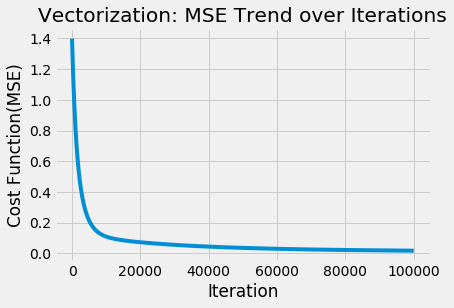

In [ ]:
plt.plot(np.arange(0, 100000),cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('Vectorization: MSE Trend over Iterations')

In [ ]:
cost_val

0.017663350184258835

* Time comparison

Text(0.5,1,'Comparison of running time')

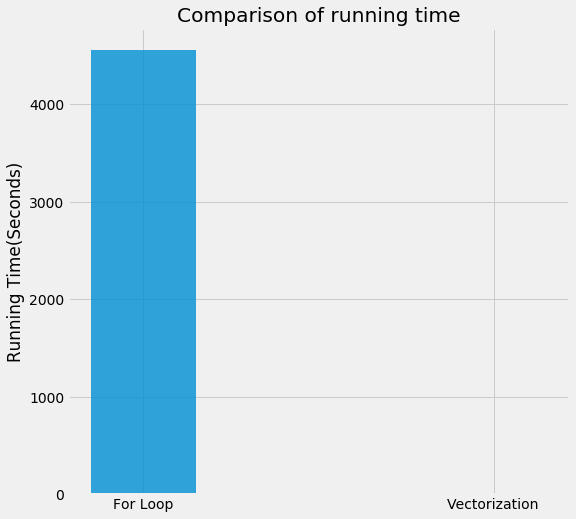

In [ ]:
figsize(8,8)

methods = ('For Loop', 'Vectorization')
x = [0,1]
time = [4558, 1.75]
plt.bar(x, time, width=0.3, align='center', alpha = 0.8)
plt.xticks(x, methods)
plt.ylabel('Running Time(Seconds)')
plt.title('Comparison of running time')

# Compare with sk-learn

In [ ]:
coef = pd.DataFrame(theta_list)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr.coef_

array([ 0.        , -0.21355017,  0.10315657,  0.0124631 ,  0.0597052 ,
       -0.1918794 ,  0.4418597 ,  0.00149367, -0.36059247,  0.15642529,
       -0.14362949, -0.19901831,  0.08206283, -0.42260541])

In [ ]:
lr.intercept_

-3.1278581821121023e-16

In [ ]:
theta

array([-2.70314260e-16, -1.07123973e-01,  8.20555240e-02,  1.78799320e-02,
        6.15094904e-02, -1.64545646e-01,  4.89301460e-01, -2.72985299e-03,
       -3.06608841e-01,  1.30539136e-01, -1.33236313e-01, -1.94457026e-01,
        9.02773726e-02, -4.11697956e-01])

In [ ]:
print('Coefficient from SKlearn.LinearRegresson: {}'. format(lr.coef_))

Coefficient from SKlearn.LinearRegresson: [ 0.         -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [ ]:
lr.coef_[1]

-0.21355016767504129

In [ ]:
test= pd.DataFrame(theta)

In [ ]:
test

,0
0,-2.703143e-16
1,-1.071240e-01
2,8.205552e-02
3,1.787993e-02
4,6.150949e-02
5,-1.645456e-01
6,4.893015e-01
7,-2.729853e-03
8,-3.066088e-01
9,1.305391e-01


In [ ]:
test['LinearRegression()']= lr.coef_

In [ ]:
test['LinearRegression()'][0] = lr.intercept_

In [ ]:
test=test.rename(columns = {0: 'Gradient Descent'})

In [ ]:
#test.index = pd.Index(['Intercept', 'theta1', 'theta2'])

In [ ]:
test

,Gradient Descent,LinearRegression()
0,-2.703143e-16,-3.127858e-16
1,-1.071240e-01,-2.135502e-01
2,8.205552e-02,1.031566e-01
3,1.787993e-02,1.246310e-02
4,6.150949e-02,5.970520e-02
5,-1.645456e-01,-1.918794e-01
6,4.893015e-01,4.418597e-01
7,-2.729853e-03,1.493667e-03
8,-3.066088e-01,-3.605925e-01
9,1.305391e-01,1.564253e-01
